<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/M%C3%B3dulo_8_Fundamentos_de_Machine_Learning_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br><br>
##### __Projeto:__ Fazer a predição da quantidade de crimes que acontece em uma determinada cidade.
###### Considere o dataset abaixo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")




In [ ]:
df = pd.read_csv("/content/sample_data/dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47



# Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

# Qual o tipo das variáveis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ind_pop_cid  2460 non-null   float64
 1   perc_pol     2460 non-null   float64
 2   taxa_crim    2460 non-null   float64
 3   nivel_ed     2460 non-null   float64
 4   crimes       2460 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 96.2 KB


In [ ]:
df.describe()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.080488,16.032527,64.945933,5.093089,177.607724
std,1.423109,10.466474,23.551127,2.827254,119.851061
min,1.000000,0.014848,0.644731,1.000000,0.000000
25%,2.000000,7.093529,47.604707,3.000000,77.000000
50%,3.000000,14.843907,68.809210,5.000000,157.000000
75%,4.000000,23.669780,84.670920,7.000000,265.000000
max,5.000000,45.147573,99.997355,10.000000,529.000000


#  Exercícios

## Parte 1:

#### Função para divisão do dataset em treino e teste.



In [ ]:
def divisão(df, train_size = 0.8):
   df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 1)
   return df_train, df_test


In [ ]:
df_train, df_test = divisão(df)

As dimensões dos dataframes df_train e df_test

In [ ]:
df_train.shape, df_test.shape

((1968, 5), (492, 5))

In [ ]:
df_train.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
906,4.0,0.818390,16.992591,3.0,92
1290,4.0,16.559066,53.670071,3.0,130
102,2.0,7.376718,80.698021,3.0,389
1179,2.0,12.673916,26.571485,1.0,83
1481,4.0,15.820727,90.743473,7.0,319


In [ ]:
df_test.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1268,5.0,8.117205,62.726098,7.0,225
2270,3.0,28.937829,99.992632,3.0,299
1617,5.0,5.831679,60.223543,9.0,203
499,2.0,12.221509,89.029058,9.0,214
535,2.0,1.622885,67.499869,5.0,264


# Parte 2:
Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 



__Primeiramente vamos identificar qual a variável que melhor prevê a quantidade de crimes.__

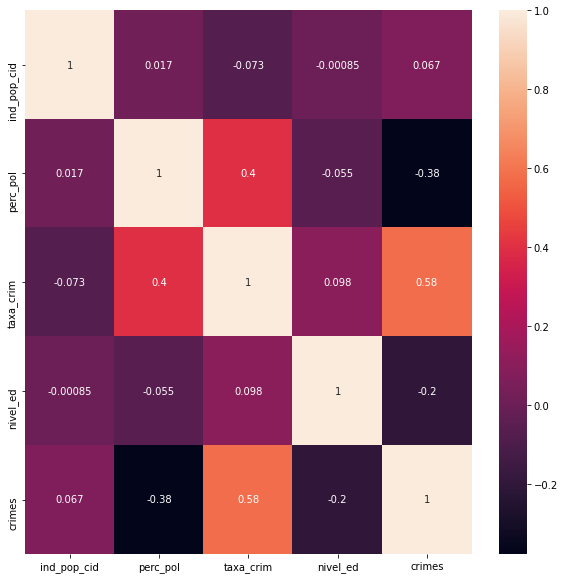

In [ ]:
#Verificando pelo gráfico de correlação.
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot = True)

Abaixo, vamos analisar a correlação das variáveis explanatórias com a variável target:

In [ ]:
 df.corr()['crimes']

ind_pop_cid    0.067237
perc_pol      -0.377929
taxa_crim      0.578659
nivel_ed      -0.200762
crimes         1.000000
Name: crimes, dtype: float64

In [ ]:
#Calculamos o coeficiente de determinação(R2): com a variável taxa_crim. 
import math
math.pow(0.58, 2)

0.3364

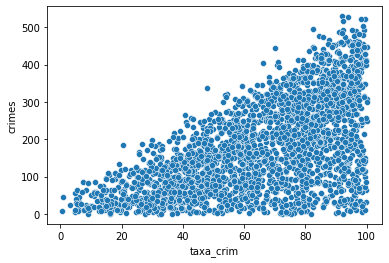

In [ ]:
sns.scatterplot(df['taxa_crim'], df['crimes']);

__Concluímos que a variável, taxa_crim, mostra ter uma correlação moderada com a variável crimes.__
<br>
Vamos descrever os crimes como uma função linear da taxa_crim.


In [ ]:
X_train = df_train['taxa_crim']
X_train

906     16.992591
1290    53.670071
102     80.698021
1179    26.571485
1481    90.743473
          ...    
960     86.104631
905     47.394077
1096    62.588582
235     69.195270
1061    90.055166
Name: taxa_crim, Length: 1968, dtype: float64

In [ ]:
y_train = df_train['crimes']
y_train

906      92
1290    130
102     389
1179     83
1481    319
       ... 
960     224
905      66
1096    207
235     211
1061    407
Name: crimes, Length: 1968, dtype: int64

In [ ]:
#Instanciando o algoritimo 

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
type(X_train), type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
#Ajustando os dados para o formato correto

X_train = X_train.values.reshape(-1, 1)
type(X_train), X_train.shape

(numpy.ndarray, (1968, 1))

In [ ]:
y_train = y_train.values.reshape(-1, 1)
type(y_train), y_train.shape


(numpy.ndarray, (1968, 1))

In [ ]:
#Fitando - treinando o modelo aos dados
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Fazendo predições

ypred = lm.predict(X_train)
ypred

array([[ 36.79871893],
       [144.63451654],
       [224.09964096],
       ...,
       [170.85591254],
       [190.28029733],
       [251.61066844]])

In [ ]:
def RMSE (y_train, y_pred):
    return np.sqrt(np.mean((y_train - y_pred)**2))

In [ ]:
#Calculamos o RMSE
RMSE(y_train = y_train, y_pred = ypred) 

98.52244965008336

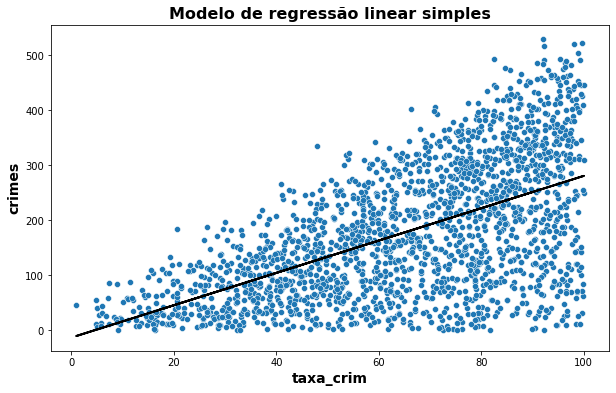

In [ ]:
plt.figure(figsize = [10,6])
plt.title('Modelo de regressão linear simples', fontweight = 'bold', fontsize = 16)
sns.scatterplot(df_train['taxa_crim'], df_train['crimes'])
plt.xlabel('taxa_crim', fontweight = 'bold', fontsize = 14)
plt.ylabel('crimes', fontweight = 'bold', fontsize = 14)
plt.plot(X_train, ypred, c = 'black', lw = 2);

In [ ]:
lm.intercept_, lm.coef_

(array([-13.16135533]), array([[2.94010923]]))

__Agora, vamos verificar se o nosso modelo está sofrendo de overfitting e a capacidade de generalização.__

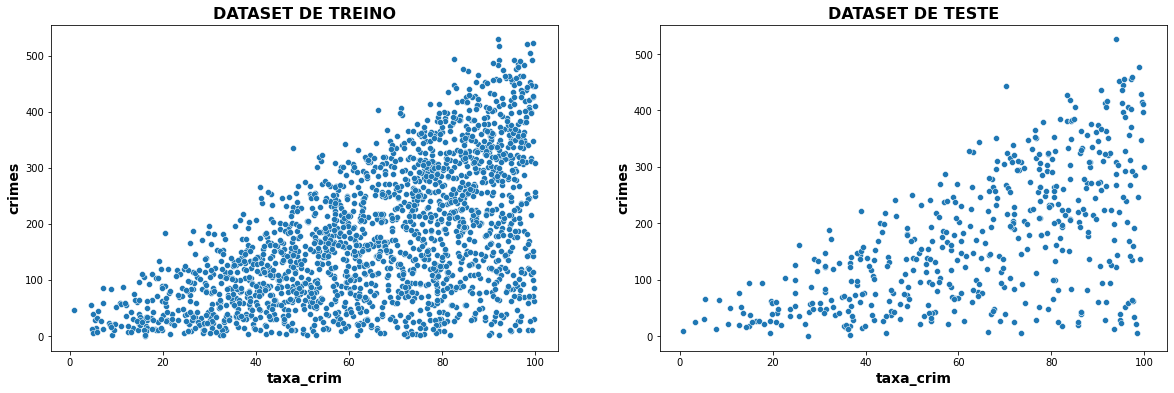

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET DE TREINO", fontsize = 16, fontweight = 'bold')
sns.scatterplot(df_train['taxa_crim'], df_train['crimes'])
plt.xlabel('taxa_crim', fontsize = 14, fontweight = 'bold')
plt.ylabel('crimes', fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET DE TESTE", fontsize = 16, fontweight  = 'bold')
sns.scatterplot(df_test['taxa_crim'], df_test['crimes'])
plt.xlabel('taxa_crim', fontsize = 14, fontweight = 'bold')
plt.ylabel('crimes', fontsize = 14, fontweight = 'bold');

In [ ]:
def plota_curva_regressao(X_train, y_train, X_test ,y_test, modelo, nome_modelo):

  modelo.fit(X_train, y_train)

  predicao_dataset_treino = modelo.predict(X_train)
  predicao_dataset_teste = modelo.predict(X_test)

  rmse_dataset_treino = np.round(RMSE(y_train = y_train, y_pred = predicao_dataset_treino), 2)
  rmse_dataset_teste = np.round(RMSE(y_train = y_test, y_pred = predicao_dataset_teste), 2)

  plt.figure(figsize = [20,6])
  plt.subplot(1,2,1)
  plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
            fontsize = 14, fontweight = 'bold')
  plt.scatter(X_train, y_train, c = 'blue', s = 20)
  plt.plot(X_train, predicao_dataset_treino, c = 'black', lw = 2, label = 'predição')
  plt.legend(fontsize = 14)
  plt.subplot(1,2,2)
  plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TESTE: " + str(rmse_dataset_teste),
            fontsize = 14, fontweight = 'bold')
  plt.scatter(X_test, y_test, c = 'blue', s = 20)
  plt.plot(X_test, predicao_dataset_teste, c = 'black', lw = 2, label = 'predição')
  plt.legend(fontsize = 14);


In [ ]:
X_train = df_train['taxa_crim'].values.reshape(-1, 1)
y_train = df_train['crimes'].values

X_test = df_test['taxa_crim'].values.reshape(-1, 1)
y_test = df_test['crimes'].values


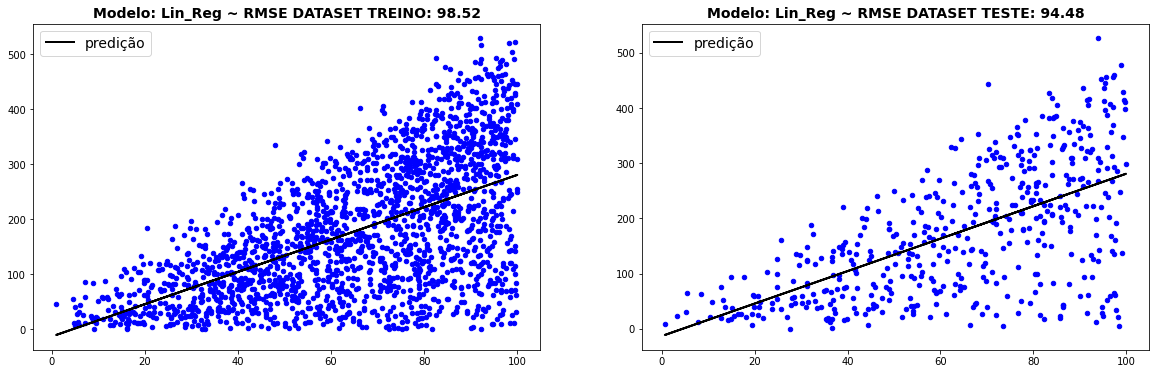

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X_train, y_train, X_test, y_test, modelo, nome_modelo)

O objetivo principal de algoritmos de machine learning é a capacidade de generalizar.

Em termos quantitativos, é esperado que as métricas (RMSE, neste caso) se mantenham em outros datasets.

No caso da regressão linear, vemos uma leve variação do RMSE (o que é normal) no dataset de teste, mas os valores são similares.

Além disso, fica evidente que a reta de regressão ainda descreve os dados de teste, mesmo tendo sido treinada apenas no dataset de treinamento.

#### O modelo de regressão linear simples parece descrever bem a relação entre taxa_crim e crimes. Além disso, vimos que o RMSE neste caso estava em torno de 98.52

__Abaixo, iremos analisar os resultados para versões do KNN - Regressor:__
- KNN(K = 1)

- KNN(K = 6)

- KNN(K = 12)

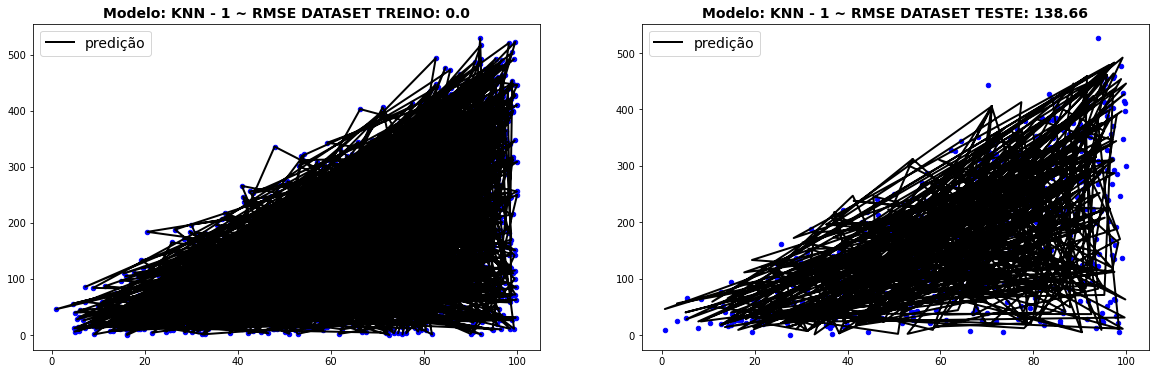

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X_train, y_train, X_test, y_test, modelo, nome_modelo)

Considerando apenas 1 vizinho, fica evidente que o KNN(K=1) não generalizou bem.

O nível de erro em treino foi 0, mas teve um alto nível de erro no dataset teste.

Neste caso, dizemos que o modelo KNN(K=1) está sofrendo de overfitting:

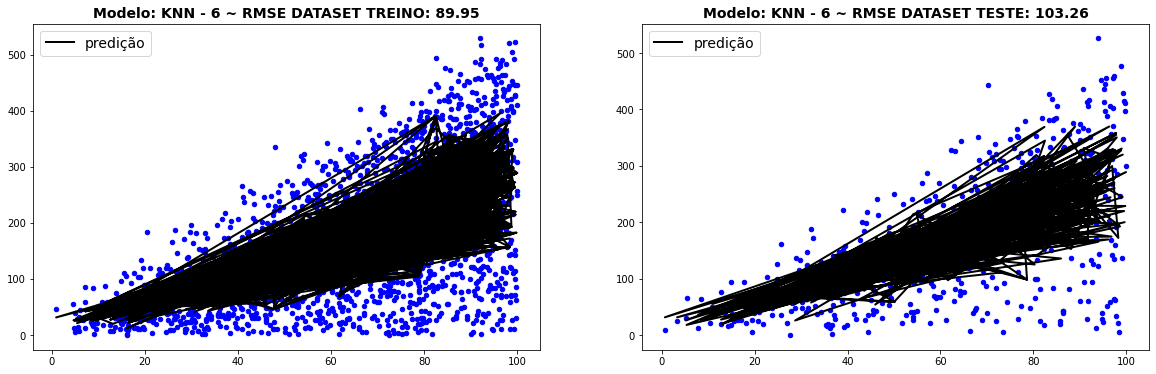

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 6'
plota_curva_regressao(X_train, y_train, X_test, y_test, modelo, nome_modelo)

Neste caso, o KNN(K=6) está generalizando bem, conforme podemos ver pelos gráficos e também ao analisar quantitativamente os valores de RMSE em treino e no dataset teste.

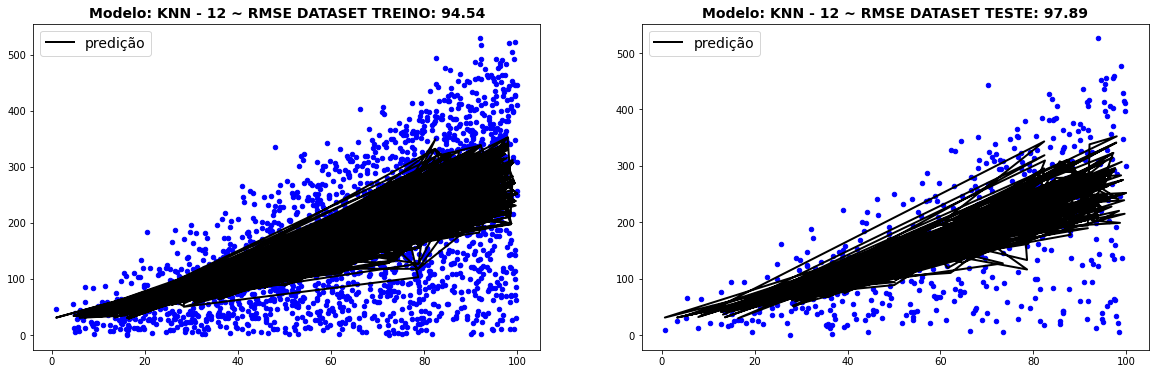

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 12)
nome_modelo = 'KNN - 12'
plota_curva_regressao(X_train, y_train, X_test, y_test, modelo, nome_modelo)

Finalmente, ao analizar o KNN(K=12) vemos que também está generalizando bem, conforme podemos ver pelos gráficos e também ao analisar quantitativamente os valores de RMSE em treino e no dataset teste.

__No exemplo acima, a regressão linear ficou muito similar ao KNN em questão__

**Conclusão:
<br>
Nesta simulação, entendemos os conceitos fundamentais de regressão linear e overfitting** 

__2 -__
<br>
Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

In [ ]:
X = df[['taxa_crim', 'ind_pop_cid', 'perc_pol', 'nivel_ed']].values
X

array([[62.08269348,  1.        ,  7.18547096, 10.        ],
       [88.24437995,  1.        , 24.45675022,  6.        ],
       [94.93025656,  1.        , 19.79177223,  1.        ],
       ...,
       [87.37266417,  1.        , 13.05599505,  9.        ],
       [46.17051713,  2.        , 22.63251672,  6.        ],
       [64.31533525,  5.        , 32.93706037,  1.        ]])

In [ ]:
y =df['crimes'].values
y

array([ 77, 202, 348, ..., 217,  42,  71])

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, y_treinamento.shape

((1968, 4), (1968,))

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(X_treinamento, y_treinamento)

0.9072808511058681

In [ ]:
lm.score(X_teste, y_teste)

0.9004710334258721

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ypred = lm.predict(X_teste)
math.sqrt(mean_squared_error(y_teste, ypred))


37.404690005571844

  __Comparação__

__Regressão linear simples X Regressão linear múltipla.__

Modelo de regressão linear simples: 98.52
<br>
Modelo de regressão linear múltipla: 37.40


#### __Conclusão: Usando todas as variáveis conseguimos melhorar o modelo.__ 